In [ ]:
import torch
print(torch.__version__)

import torchvision
from torchvision import datasets, transforms

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, )
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, )

print(len(mnist_trainset))
print(len(mnist_testset))

1.9.0+cu102



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


4
torch.Size([784])


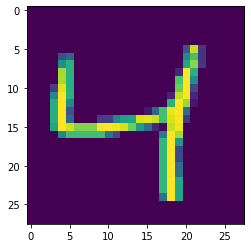

In [ ]:
import matplotlib.pyplot as plt

i = 2
example = mnist_trainset[i]
img = example[0]
label = example[1]
plt.imshow(img)
print(label)

trans = transforms.ToTensor()
tensor = trans(img).view(28*28)
print(tensor.shape)

In [ ]:
W1 = torch.nn.Parameter(torch.zeros(32, 784).uniform_(-0.1, 0.1))
b = torch.nn.Parameter(torch.zeros(32).uniform_(-0.1, 0.1))
W2 = torch.nn.Parameter(torch.zeros(10, 32).uniform_(-0.1, 0.1))

print(W1)

Parameter containing:
tensor([[ 0.0803,  0.0498,  0.0280,  ...,  0.0227,  0.0286,  0.0070],
        [ 0.0035, -0.0071, -0.0440,  ..., -0.0723,  0.0363,  0.0006],
        [-0.0260,  0.0034,  0.0360,  ...,  0.0614, -0.0528,  0.0805],
        ...,
        [ 0.0488,  0.0754, -0.0742,  ..., -0.0320,  0.0302,  0.0835],
        [ 0.0099, -0.0343,  0.0162,  ..., -0.0467, -0.0146,  0.0179],
        [ 0.0852, -0.0712, -0.0128,  ...,  0.0159, -0.0713, -0.0847]],
       requires_grad=True)


In [ ]:
import random
import tqdm

lr = 1e-4
optimizer = torch.optim.Adam([W1, b, W2], lr=lr)

losses = []
updates = []
update = 0

for epoch in range(10):
  for num in tqdm.tqdm(range(len(mnist_trainset))):
    i = random.randint(0, 4999)
    optimizer.zero_grad()
    example = mnist_trainset[i]
    img = example[0]
    tensor = trans(img).view(28*28)
    label = example[1]
  
    Y = W2 @ torch.relu(W1 @ tensor + b)
    a = torch.exp(Y)
    sum = torch.sum(a)
    loss = -torch.log(a[label] / sum)
    update += 1
    updates.append(update)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

100%|██████████| 60000/60000 [01:15<00:00, 794.60it/s]


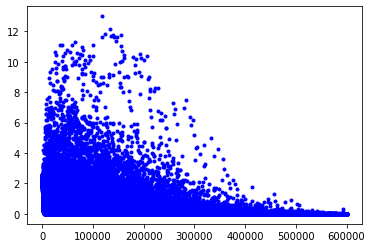

In [ ]:
import matplotlib.pyplot as plt
plt.plot(updates, losses, 'b.')

tensor(3)


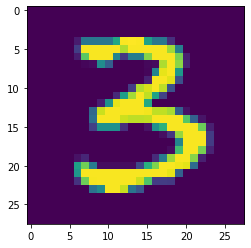

In [ ]:
i = 4621
test = mnist_testset[i]
img = test[0]
plt.imshow(img)
tensor = trans(img).view(28*28)
Y = W2 @ torch.relu(W1 @ tensor + b)
a = torch.exp(Y)
sum = torch.sum(a)
result = a/sum
print(torch.argmax(result))